In [3]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

C:\Users\ishra\AppData\Local\Temp\ipykernel_10008\4224182485.py:2: WavFileWarning: Reached EOF prematurely; finished at 148096 bytes, expected 148146 bytes from header.
  sample_rate, audio_data = wavfile.read("Normal_Heart.wav")


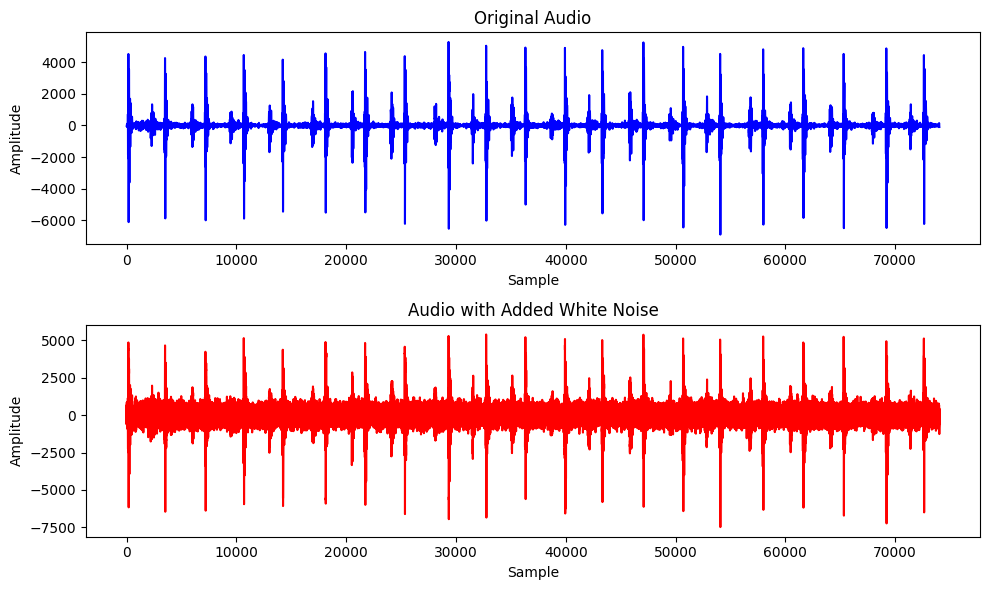

Noise added and saved as Normal_Heart_noise_added.wav


In [10]:
# Load the original audio file
sample_rate, audio_data = wavfile.read("Normal_Heart.wav")

max_amplitude = max(abs(audio_data))

# Define the parameters for the white noise
noise_amplitude =  max_amplitude*0.05

# Generate white noise with the same length as the audio
noise = noise_amplitude * np.random.normal(0, 1, len(audio_data))

# Add the white noise to the original audio
audio_with_noise = audio_data + noise

# Ensure the audio is within the valid range [-32768, 32767]
audio_with_noise = np.clip(audio_with_noise, -32768, 32767)

# Save the audio with added noise as a new WAV file
wavfile.write("Normal_Heart_noise_added.wav", sample_rate, audio_with_noise.astype(np.int16))

# Plot the original and noisy audio signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(audio_data, color='b')
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.title("Audio with Added White Noise")
plt.plot(audio_with_noise, color='r')
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

print("Noise added and saved as Normal_Heart_noise_added.wav")


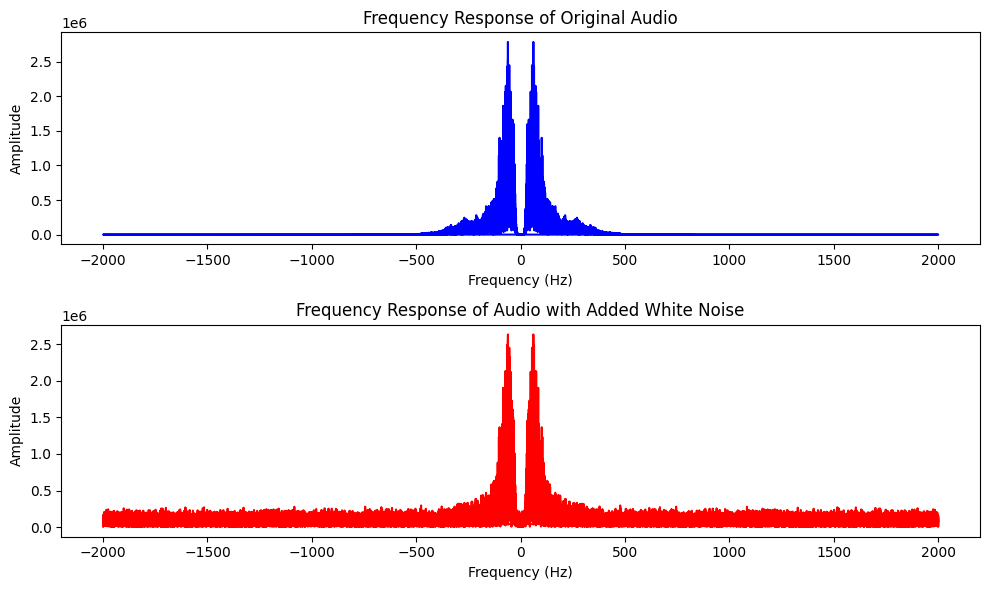

In [11]:
# Compute the FFT of the original audio and the audio with added white noise
fft_original = np.fft.fft(audio_data)
fft_with_noise = np.fft.fft(audio_with_noise)

# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(len(audio_data), 1 / sample_rate)

# Plot the frequency response of the original audio
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Frequency Response of Original Audio")
plt.plot(frequencies, np.abs(fft_original), color='b')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

# Plot the frequency response of the audio with added white noise
plt.subplot(2, 1, 2)
plt.title("Frequency Response of Audio with Added White Noise")
plt.plot(frequencies, np.abs(fft_with_noise), color='r')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()
